# QuickStart

This is a quick start guide about the main classes or functions in `pyc2mc`.

## Element and isotopes

`pyc2mc` implements the atomic and isotopic data from the 
[NIST data base](https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses).

The best option to use these data is to use the classes `Isotope` and `Element`.

In [1]:
from pyc2mc.core.isotopes import Element, Isotope

### Element

A chemical element is defined from `Z`. You can get informations about the
available isotopes of one element.

In [2]:
oxygen = Element(8)
oxygen

O; Element(8)

The exact mass of *the most abundant isotope* of the element is one of the property of the class.

In [3]:
oxygen.exact_mass_most_abundant

15.9949146195717

Below is the atomic weight which is the average of the exact masses of the available isotopes weighted by the isotpic abundance.

In [4]:
oxygen.atomic_weight

15.9994

In [5]:
oxygen.symbol

'O'

In [6]:
print(f"Atomic number of {oxygen.symbol} is {oxygen.Z}")

Atomic number of O is 8


Data about the oxygen's isotopes can be obtained from the class. The aim of `dropna = True` is to remove isotopes for which the abundance is not known.

In [7]:
oxygen.get_isotopes(dropna=True)

atomic number element  mass number  exact mass  isotopic abundance  \
0              8       O           16   15.994915            0.997572   
1              8       O           17   16.999132            0.000381   
2              8       O           18   17.999160            0.002051   

   standard atomic weight super symbol symbol isotope  
0                 15.9994          ¹⁶O    16O     ¹⁶O  
1                 15.9994          ¹⁷O    17O     ¹⁷O  
2                 15.9994          ¹⁸O    18O     ¹⁸O

### Isotopes

An isotope of a chemical element is defined by `A` (mass number) and `Z` (atomic number).

In [8]:
_10B = Isotope(5, 10)
_10B

^10B; Isotope(5, 10)

From an element you can obtain isotope objects.

In [9]:
isotopes = oxygen.get_isotopes(dropna=True, return_type="object")

for isotope in isotopes:
    print(f"{isotope.symbol}: A = {isotope.A} Z = {isotope.Z} exact mass = {isotope.exact_mass:.5f}")

18O: A = 18 Z = 8 exact mass = 17.99916
16O: A = 16 Z = 8 exact mass = 15.99491
17O: A = 17 Z = 8 exact mass = 16.99913


### Isotope class methods

Some data can be obtained without creating any Isotope object.

Get mass shifts between isoptopes. Here the probability on which the threshold is applied is 
the product of the abundance ratio of the isotopes pair.

In [10]:
Isotope.get_mass_shifts("S", threshold=1e-4)

isotopes  mass_shift  probability
0  34S-32S    1.995796     0.040395
1  33S-32S    0.999388     0.007143
2  33S-34S   -0.996408     0.000320
3  36S-32S    3.995010     0.000104

Get isotope objects.

In [11]:
Isotope.get_isotopes(elements=["C", "S"], dropna=True)

{^12C; Isotope(6, 12),
 ^13C; Isotope(6, 13),
 ^32S; Isotope(16, 32),
 ^33S; Isotope(16, 33),
 ^34S; Isotope(16, 34),
 ^36S; Isotope(16, 36)}

Get a data frame with isotopic data.

In [12]:
Isotope.get_isotopes_data(atomic_numbers=[7, 8], dropna=True)

atomic number element  mass number  exact mass  isotopic abundance  \
0              7       N           14   14.003074            0.996362   
1              7       N           15   15.000109            0.003642   
2              8       O           16   15.994915            0.997572   
3              8       O           17   16.999132            0.000381   
4              8       O           18   17.999160            0.002051   

   standard atomic weight super symbol symbol isotope  
0               14.006855          ¹⁴N    14N     ¹⁴N  
1               14.006855          ¹⁵N    15N     ¹⁵N  
2               15.999400          ¹⁶O    16O     ¹⁶O  
3               15.999400          ¹⁷O    17O     ¹⁷O  
4               15.999400          ¹⁸O    18O     ¹⁸O

## Molecular Formula

Molecular formula are represented by the `Formula` object.

In [13]:
from pyc2mc.core.formula import Formula

In [14]:
formula = Formula.from_string("C10 H23 O8 S2")
formula

Formula(C10 H23 O8 S2)

It is basically a mapping 
between species and amount and can be used as a dictionary.

In [15]:
for element, amount in formula.items():
    print(element, amount)

C 10
H 23
O 8
S 2


Hereafter are few instance attributes.

In [16]:
formula.chem_class, formula.chem_group

('O8 S2', 'O S')

In [17]:
formula.is_isotopic

False

In [18]:
formula.exact_mass

335.0834350468986

In [19]:
formula.get_ion_exact_mass(polarity=-1)

335.0839836267986

In [20]:
formula.get_calculated_mz(polarity=-1)  # synonym of ion exact mass

335.0839836267986

Look at an isotopic formula. Formula is labelled as *isotopic* if at
least one species in the composition is not the most abundant isotope.
In the example below, `18O` was added to the formula.

In [21]:
iso_formula = Formula.from_string("C10 H23 O8 S2 18O1")
iso_formula

Formula(C10 H23 O8 S2 18O1)

In [22]:
iso_formula.is_isotopic

True

In [23]:
iso_formula.chem_class

'O8 S2 18O1'

In [24]:
iso_formula.elemental_composition

{'C': 10, 'H': 23, 'O': 9, 'S': 2}

In [25]:
iso_formula.elements

{C; Element(6), H; Element(1), O; Element(8), S; Element(16)}

In [26]:
iso_formula.isotopes

{'18O'}

In [27]:
iso_formula.species_as_isotope

{'O': ^16O; Isotope(8, 16),
 'H': ^1H; Isotope(1, 1),
 'C': ^12C; Isotope(6, 12),
 'S': ^32S; Isotope(16, 32),
 '18O': ^18O; Isotope(8, 18)}

## PeakList and AttributedPeakList

PyC2MC `peak` module provides classes to manage peaks lists. 

Peaks list is basically a list of peaks and the python objects follow this idea.
`PeakList` and `AttributedPeakList` behave like a python list but are immutable objects.

* `Peak` is a peak with a m/z value, intensity, S/N
* `PeakList` is a list of `Peak` objects.
* `AttributedPeak` is a `Peak` with a molecular formula
* `AttributedPeakList` is a list of `AttributedPeak` or `Peak` objects.

In order to create a `PeakList` object the best option is to read it from a file
using for example `pyc2mc.io.peaklist.read_peaklist()`. Several formats are
supported.

Here we will create it manually.

In [28]:
from pyc2mc.core.peak import PeakList, AttributedPeakList

In [29]:
mz = [773.25664, 755.30271, 789.28796, 711.20534, 821.2765 , 767.26689,
      733.24546, 733.22601, 668.25462, 722.26412, 697.22627, 723.27791,
      712.27857, 673.24198, 791.26585, 719.21115, 736.24354, 701.23629,
      599.17429, 555.29359, 845.27664, 695.20967, 727.23518, 657.21016,
      775.27111, 693.25254, 761.27703, 665.2363 , 729.23176, 660.28673,
      664.45378, 698.26611, 801.25066, 674.26471, 689.25739, 675.22097,
      783.26045, 673.29764, 666.20365, 701.40998, 629.25707, 639.20483,
      665.19971, 713.29279, 682.19887, 684.20185, 668.21904, 762.25823,
      643.2516 , 595.28723]

intensity = [ 5928320.,  4639685.,  5577804.,  9014133.,  4662291.,  9146784.,
              7664701.,  9604155.,  8574864.,  4514893., 19815340., 11802803.,
              5530617.,  5310111.,  8801961., 10290960.,  5741878.,  5335584.,
              5944162.,  4345103.,  4830464., 15325791., 13781549.,  5145305.,
              6897403., 12294415.,  6596205., 19865676.,  7420642.,  4512410.,
              5127533.,  7904340.,  4781139.,  8203676., 19465786., 11971204.,
              8062431.,  5408941.,  8159580.,  5172794.,  9935090., 13225342.,
             20901954.,  8461427.,  5877940.,  5481048., 11228038.,  5009129.,
             28394420.,  4686374.]

SN = [0.00813, 0.00736, 0.00699, 0.0067 , 0.0065 , 0.0064 , 0.00622,
      0.00608, 0.00594, 0.00589, 0.00583, 0.00576, 0.00571, 0.00564,
      0.00561, 0.00557, 0.00553, 0.0055 , 0.00546, 0.00543, 0.0054 ,
      0.00535, 0.00532, 0.00529, 0.00527, 0.00525, 0.00522, 0.0052 ,
      0.00517, 0.00512, 0.0051 , 0.00506, 0.00501, 0.00499, 0.00495,
      0.00492, 0.0049 , 0.00489, 0.00487, 0.00484, 0.00479, 0.00477,
      0.00474, 0.00473, 0.0047 , 0.00468, 0.00466, 0.00464, 0.00461,
      0.00459]

### PeakList

By default, peaks are sorted according to their mz values.

In [30]:
pl = PeakList(mz=mz, intensity=intensity, SN=SN, name="A test")

In [31]:
len(pl)

50

In [32]:
peak = pl[9]
peak

Peak(mz=  665.199710, intensity=2.090195e+07, SN=   0.005, pid=42)

In [33]:
peak.mz

665.19971

In [34]:
pl.mz.max()

845.27664

`PeakList` can be filtered according to mz, SN or intensity.

In [35]:
delim_pl = pl.delimit(mz_bounds=(600, 700))
delim_pl

Peaklist (22 peaks)
Peak(mz=  629.257070, intensity=9.935090e+06, SN=   0.005, pid=40)
Peak(mz=  639.204830, intensity=1.322534e+07, SN=   0.005, pid=41)
Peak(mz=  643.251600, intensity=2.839442e+07, SN=   0.005, pid=48)
Peak(mz=  657.210160, intensity=5.145305e+06, SN=   0.005, pid=23)
Peak(mz=  660.286730, intensity=4.512410e+06, SN=   0.005, pid=29)
Peak(mz=  664.453780, intensity=5.127533e+06, SN=   0.005, pid=30)
Peak(mz=  665.199710, intensity=2.090195e+07, SN=   0.005, pid=42)
Peak(mz=  665.236300, intensity=1.986568e+07, SN=   0.005, pid=27)
Peak(mz=  666.203650, intensity=8.159580e+06, SN=   0.005, pid=38)
Peak(mz=  668.219040, intensity=1.122804e+07, SN=   0.005, pid=46)
Peak(mz=  668.254620, intensity=8.574864e+06, SN=   0.006, pid=8)
Peak(mz=  673.241980, intensity=5.310111e+06, SN=   0.006, pid=13)
Peak(mz=  673.297640, intensity=5.408941e+06, SN=   0.005, pid=37)
Peak(mz=  674.264710, intensity=8.203676e+06, SN=   0.005, pid=33)
Peak(mz=  675.220970, intensity=1.197120e+0

In [36]:
delim_pl = pl.delimit(SN_bounds=0.006)
delim_pl

Peaklist (8 peaks)
Peak(mz=  711.205340, intensity=9.014133e+06, SN=   0.007, pid=3)
Peak(mz=  733.226010, intensity=9.604155e+06, SN=   0.006, pid=7)
Peak(mz=  733.245460, intensity=7.664701e+06, SN=   0.006, pid=6)
Peak(mz=  755.302710, intensity=4.639685e+06, SN=   0.007, pid=1)
Peak(mz=  767.266890, intensity=9.146784e+06, SN=   0.006, pid=5)
Peak(mz=  773.256640, intensity=5.928320e+06, SN=   0.008, pid=0)
Peak(mz=  789.287960, intensity=5.577804e+06, SN=   0.007, pid=2)
Peak(mz=  821.276500, intensity=4.662291e+06, SN=   0.006, pid=4)

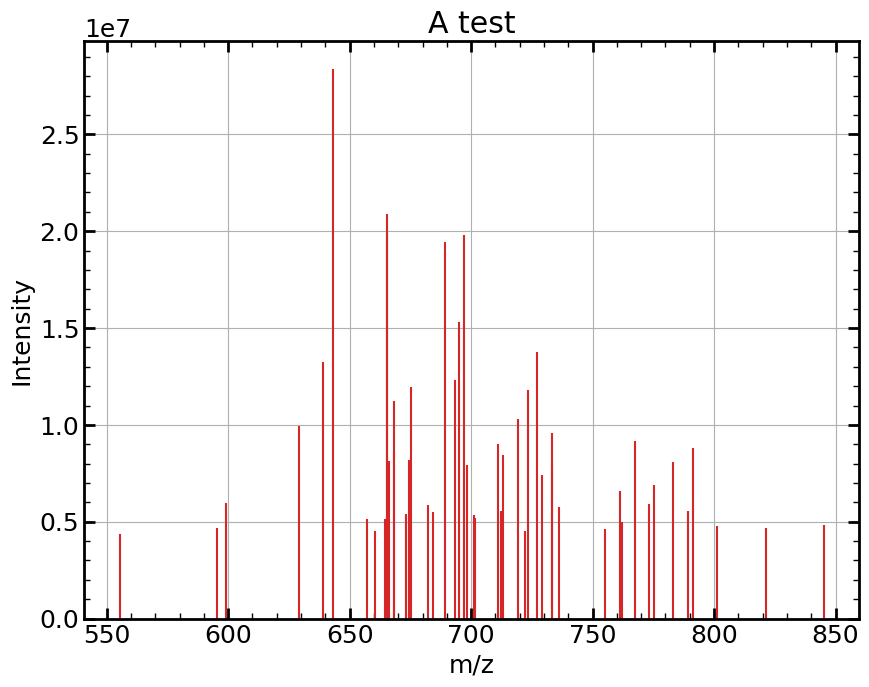

In [37]:
pl.plot()

### Attributed peaks list

In [38]:
formulas = ['C43 H42 O12 Na1', 'C53 H41 O4 N1', 'C44 H46 O12 Na1', 'C37 H36 O13 Na1',
            'C41 H45 O16 N2', 'C58 H35 Na1 13C1', 'C34 H41 O16 N2', 'C45 H33 O6 N2 Na1 13C1',
            'C31 H42 O15 N1', 'C47 H39 O6 Na1', 'C41 H34 O9 N1 13C1', 'C40 H44 O11 Na1',
            'C31 H47 O16 N1 Na1', 'C26 H43 O19 N1', 'C40 H43 O15 N2', 'C27 H40 O19 N2 Na1',
            'C47 H37 O7 Na1', 'C40 H38 O10 Na1', '', '', 'C43 H45 O16 N2', 'C26 H38 O19 N2 13C1',
            'C50 H33 O5 N1', 'C38 H34 O9 Na1', 'C40 H43 O14 N2', '', 'C51 H39 O6 N1',
            'C42 H33 O4 N2 Na1 13C1', 'C29 H42 O18 N2 Na1', 'C39 H40 O7 N1 13C2', '',
            'C42 H37 O5 N2 Na1 13C2', 'C56 H35 O5 N1', 'C48 H34 N2 Na1 13C1', 'C41 H37 O6 N2 Na1 13C1',
            'C42 H32 O7 N1 13C1', 'C38 H43 O16 N2', 'C49 H39 O2 N1', 'C45 H30 O6',
            'C49 H53 O2 N2', 'C31 H42 O12 Na1', 'C31 H36 O13 Na1', 'C41 H29 O5 N2 Na1 13C1',
            'C52 H38 N2 Na1', 'C46 H29 O4 N1 Na1', 'C45 H29 O4 N2 Na1', 'C31 H37 O13 N2 Na1',
            'C42 H40 O12 13C2', 'C24 H42 O17 N2 13C1', 'C44 H37 O1 N1']

In [39]:
att_pl = AttributedPeakList(
    mz=mz, intensity=intensity, SN=SN,
    formulas=formulas, polarity=-1
)

In [40]:
att_pl.summary()

 Attribution results:
 Total number of peaks: 50
 Attributed peaks     : 46
 Mean error (ppm)     : 1.53058
 Std error (ppm)      : 0.44826
 Attributed percentage: 92.0 %
 hits percentage      : 93.79 %


In [41]:
att_pl[18]

AttributedPeak(mz=  682.198870, intensity=5.877940e+06, formula=C46 H29 O4 N1 Na1, SN=   0.005, pid=44)

In [42]:
att_pl[18].mz

682.19887

In [43]:
att_pl[22].formula

Formula(C26 H38 O19 N2 13C1)

Attributed peak list can be exported as a pandas `DataFrame` to be used later. 
Set the `full_data` argument to `True` to get elemental composition and other
additional columns.

In [44]:
att_pl.to_dataframe(attributed_only=True).head()
#att_pl.to_dataframe(attributed_only=True, full_data=True).head()

mz   intensity              formula  polarity       SN  error_ppm  \
49  595.28723   4686374.0        C44 H37 O1 N1        -1  0.00459   1.399989   
40  629.25707   9935090.0      C31 H42 O12 Na1        -1  0.00479   1.389972   
41  639.20483  13225342.0      C31 H36 O13 Na1        -1  0.00477   1.688152   
48  643.25160  28394420.0  C24 H42 O17 N2 13C1        -1  0.00461   1.012527   
23  657.21016   5145305.0       C38 H34 O9 Na1        -1  0.00529   0.670309   

    attributed attribution_method  
49        True            unknown  
40        True            unknown  
41        True            unknown  
48        True            unknown  
23        True            unknown

## Kendrick Series

`pyc2mc` can identify kendrick series based on a given building block. The
building block is a molecular formula.

Let's load the [quickstart.csv](data/quickstart.csv) file and look for `N1 H1` series.

In [45]:
from pyc2mc.io.peaklist import read_peaklist
from pyc2mc.processing.kendrick_series import get_kendrick_series

In [46]:
pl = read_peaklist("data/quickstart.csv", fmt="csv")

To identify the Kendrick series, you need to provide a peak list, 
the building block (as a `Formula` object or from a string) and
an error width, `lambda_parameter`, in ppm.

In [47]:
ks = get_kendrick_series(
    pl,
    lambda_parameter=2,
    building_block=Formula.from_string("N H"),
    min_length=6
)

`ks` is a `KendrickSeriesList` object. As `PeakList` it is a python list of
`KendrickSeries` object.

`KendrickSeries` object is a child class of `PeakList`.

In [48]:
print("ks is :", type(ks), "\nks[1] is :", type(ks[1]))

ks is : <class 'pyc2mc.core.kendrick.KendrickSeriesList'> 
ks[1] is : <class 'pyc2mc.core.kendrick.KendrickSeries'>


In [49]:
print("Number of series: ", len(ks))

Number of series:  130


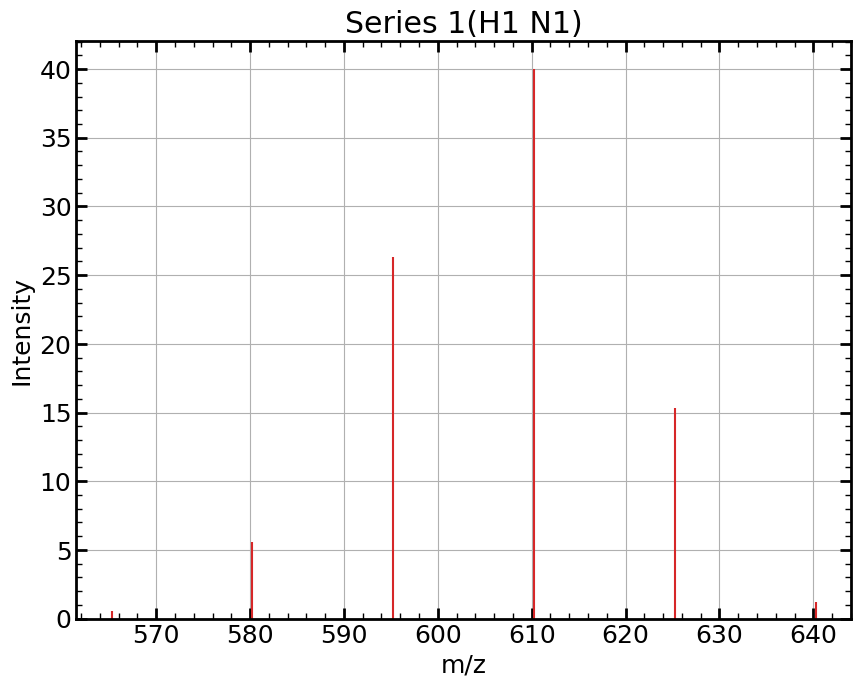

In [50]:
ks[1].plot()

In [51]:
ks[1].to_dataframe()

mz  intensity       SN          KM
1039  565.23926   0.523533    15.31  564.828854
1296  580.25015   5.540474   171.56  579.828845
1568  595.26103  26.333374   819.11  594.828826
1880  610.27191  40.034004  1475.86  609.828807
2195  625.28280  15.356275   565.39  624.828798
2467  640.29368   1.179104    42.33  639.828779

You can try to assign the series from a formula grid. This will assign the lowest m/z peak
of the series.

In [52]:
from pyc2mc.core.formula_grid import FormulaGrid

In [53]:
# set up a basic formula grid
# C0-100 H0-200 N0-20 O0-10
fg = FormulaGrid.from_formula(
    "C100 H200 N20 O10",
    mass_bounds=(500, 700),
    polarity=-1,
)

Look for candidates of the lowest m/z peak in the kendrick series.

In [54]:
ks[1].get_candidates(fg, lambda_parameter=2)

C   H   O   N  ion_exact_mass  nominal_mass   err_mDa   err_ppm  isotopic  \
6  25  35  10   5      565.238941           565  0.319074  0.564494     False   
2  24  29   5  12      565.238936           565  0.324334  0.573800     False   
0  23  23   0  19      565.238930           565  0.329594  0.583106     False   
3  40  29   0   4      565.239771           565 -0.510533 -0.903214     False   
5  39  33   4   0      565.238433           565  0.826878  1.462883     False   
1  25  25   1  16      565.240273           565 -1.013076 -1.792293     False   
4  26  31   6   9      565.240278           565 -1.018337 -1.801600     False   

          formula  
6  C25 H35 O10 N5  
2  C24 H29 O5 N12  
0     C23 H23 N19  
3      C40 H29 N4  
5      C39 H33 O4  
1  C25 H25 O1 N16  
4   C26 H31 O6 N9

You can then set the formula to each peak of the series according to a 
selected formula for the lowest m/z peak of the series according to the
lowest error or the suitable one according to the condition or experimental
set up.

In [55]:
ks[1].attribute_series(fg, formula="C40 H23 N2")

AttributedKendrickSeries (6 peaks)
Building block H1 N1
AttributedPeak(mz=  565.239260, intensity=5.235326e-01, formula=C40 H23 N2, SN=  15.310, pid=1039)
AttributedPeak(mz=  580.250150, intensity=5.540474e+00, formula=C40 H24 N3, SN= 171.560, pid=1296)
AttributedPeak(mz=  595.261030, intensity=2.633337e+01, formula=C40 H25 N4, SN= 819.110, pid=1568)
AttributedPeak(mz=  610.271910, intensity=4.003400e+01, formula=C40 H26 N5, SN=1475.860, pid=1880)
AttributedPeak(mz=  625.282800, intensity=1.535627e+01, formula=C40 H27 N6, SN= 565.390, pid=2195)
AttributedPeak(mz=  640.293680, intensity=1.179104e+00, formula=C40 H28 N7, SN=  42.330, pid=2467)